In [1]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML
import requests

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

## HOG 알고리즘
- 1차 미분한 값의 방향에 대한 히스토그램
- 기존 엣지로 나온 x축방향, y축 방향 값이 얼마나있느냐로 코너/외곽선의 가능성을 판단했는데(모든방향에 엣지가 있으면 코너일 가능성있다 판단)
- hog는 엣지의 "방향성"만 보고 사람인지 아닌지 판단하는것

In [3]:
cap = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret:
        break

    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()


In [4]:
cap = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)


while True:
    ret, frame = cap.read()
    if not ret: break
        
    fgmask = fgbg.apply(frame)        
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)        
    cv2.imshow('mask', fgmask)
    cv2.imshow('frame', frame)
        
    if cv2.waitKey(-1) == 27:  break

cv2.destroyAllWindows()

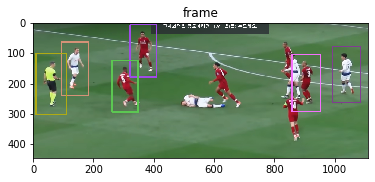

In [6]:
frame = cv2.imread('hogtest.png')
detected, _ = hog.detectMultiScale(frame)

for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

imshow('frame', frame)

In [7]:
def detectHuman(frame):
    detected, _= hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
    return detected

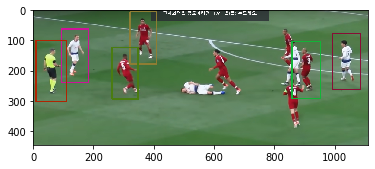

In [8]:
frame= cv2.imread('hogtest.png')
detectHuman(frame)
imshow("",frame)

# web

- 예시 코드
%%writefile server.py
import cv2
import numpy as np

from flask import Flask, request, render_template, make_response
app = Flask(__name__)

@app.route('/')
def index():
    html= """
    보행자검출 test 입니다
    <img src=/video_test width=320 height=240>
    """
    return  ""


def gen():
    while True:
        read_return_code, frame = vc.read()
        
        #함수 넣을자리
        

        # 출력
        encode_return_code, image_buffer = cv2.imencode('.jpg', frame)
        io_buf = io.BytesIO(image_buffer)
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + io_buf.read() + b'\r\n')


if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

In [12]:
%%writefile server.py
import cv2
import numpy as np

from flask import Flask, request, render_template, make_response
app = Flask(__name__)

@app.route('/')
def index():
    html= """
    보행자검출 test 입니다
    <img src=/video_test width=320 height=240>
    """
    return  html


def gen():
    while True:
        read_return_code, frame = vc.read()
        
        def detectHuman(frame):
            detected, _= hog.detectMultiScale(frame)

            for (x, y, w, h) in detected:
                c = (random.randint(0, 255),
                     random.randint(0, 255), 
                     random.randint(0, 255))
            cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
        return detected
        
        encode_return_code, image_buffer = cv2.imencode('.jpg', frame)
        io_buf = io.BytesIO(image_buffer)
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + io_buf.read() + b'\r\n')

@app.route('/view')
def view():
    global datas
    return str(datas)

if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [13]:
%%writefile server.py
import cv2
import numpy as np
import io
import random

from flask import Flask, request, render_template, make_response, Response
app = Flask(__name__)

vc = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

datas = []

def detectHuman(frame) :
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
    return detected    

@app.route('/')
def index():
    html = """
    
   <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.9.1/jquery.min.js"></script>


        보행자 검출 Test<br>
        <img src=/video_feed width=320 height=240>        
        
        <div id=view> </div>
        <script>
            $("#view").html('hello');
        </script>
    """
    return  html

def gen():
    global vc
    global datas
    while True:
        read_return_code, frame = vc.read()
        
        if not read_return_code :
            vc = cv2.VideoCapture('vtest.avi')
            break;
        
        rect = detectHuman(frame)
        
        datas.append(len(rect))
        print(datas)
        
        encode_return_code, image_buffer = cv2.imencode('.jpg', frame)
        io_buf = io.BytesIO(image_buffer)
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + io_buf.read() + b'\r\n')


@app.route('/video_feed')
def video_feed():
    """Video streaming route. Put this in the src attribute of an img tag."""
    return Response(
        gen(),
        mimetype='multipart/x-mixed-replace; boundary=frame'
    )

@app.route('/view')
def view():
    global datas
    return str(datas)
    
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [ ]:
# yield 
def fun():
    file= fopen("") #5GB
    while True:
        yield 10 
        yield 20
        yield 30
    
a= fun()`
print(next(a))
print(next(a))
print(next(a))



- human.html 코드 중 
json =  JSON.parse(data); 파싱해주는 함수
"[1,2,3,4,5]" -> [1,2,3,4,5]

## 14장 특징 검출

- 지역 특징이 만족해야할 특성
    - 반복성/ 분별력/ 지역성: 내 한점만이 아니라 주변 정보도/ 정확성/ 적당한 양/ 계산효율성
    
- 사람에게 쉬운 곳이 컴퓨터에게도 쉽다: 여러 방향으로 밝기 변화가 나타나는 곳일수록 높은점수, 좋은 특징점


- 모라벡: 노이즈에 너무 취약해서(가우시간블러 사전처리 필요), int베이스로밖에 주변을 찾지 못하기때문에 

- 해리스 코너: th로 잘라버리면 그 이상값들이 다 코너되어버리기때문에, 주변 비교해서 최대값을 대표점으로 선택:비최대 억제(이웃화소보다 크지 않으면 억제됨-최대비): intencity는 이동/회전에 의해 값이 바뀌나 얘는 이동회전에는 안바뀜(다같이 이동/회전하므로), 그래도 스케일에는 변화됨


## FAST

In [2]:
src= cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

fast= cv2.FastFeatureDetector_create(60) #threshold 60 특징방법create (120 처럼 큰 값을 주면 강한 코너점들 찾겠다는것)

keypoints= fast.detect(src) #코너점 검출 detect 앞으로도 비슷하게 쓰일것

print(len(keypoints)) #이영상에서 키포인트 580개 검출
keypoints[0]

580


<KeyPoint 000001FA9EC26ED0>

In [19]:
#print(keypoints) # 코너점들의 목록을 가진 리스트 타입: keypoint

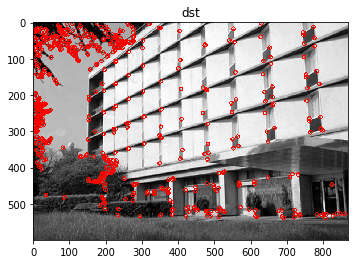

In [20]:
dst= cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt= (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255),2)
imshow('dst',dst)

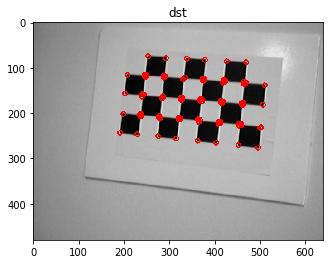

In [21]:
src= cv2.imread('chessboard.jpg', cv2.IMREAD_GRAYSCALE)

fast= cv2.FastFeatureDetector_create(60) 
keypoints= fast.detect(src) 

dst= cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt= (int(kp.pt[0]), int(kp.pt[1]))
    cv2.circle(dst, pt, 5, (0,0,255),2)
imshow('dst',dst)

## cv2.drawKeypoints

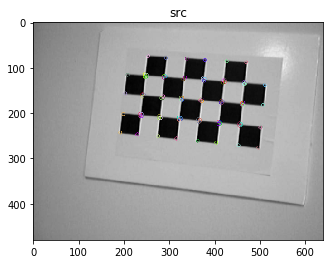

In [22]:
dst= cv2.drawKeypoints(src, keypoints, None, (-1,-1,-1),cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
imshow('src',dst)

## 크기불변 특징점 검출
- SIFT 특징점 검출 위해 가우시안피라미드, DoG구성


# ORB


In [3]:
src= cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

orb= cv2.ORB_create()

keypoints= orb.detect(src) #이동회전해도 동일한점 찾을수있음

keypoints, desc= orb.compute(src, keypoints)

print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)
            
dst=cv2.drawKeypoints(src, keypoints, None, (-1,-1,-1), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
                      
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(keypoints): 500
desc.shape: (500, 32)


- desc.shape: (500, 32): 32는 256개의 비트수를 /8bit씩 끊었기 때문에. 

In [4]:
#행렬에서는 y먼저!!순서바뀜 주의
#밝기값 75 intensity 를 desc (664,291)좌표를 32개의 데이터로 표시한것 
print(keypoints[0].pt[0], keypoints[0].pt[1])
print(src[int(keypoints[0].pt[1]), int(keypoints[0].pt[0])])
print(desc[0,:])

664.0 291.0
75
[ 17 205 111 254  28 134  79 244 196  64 222 198 113 231 176  97 124 226
  63 238 233 139  62 189 242 239 170 136  61 186 112 120]


# BRIEF
- 내 주변정보까지같이 고려: 두개를 비교해서 뒤가 밝으면 1, 그렇지않으면 0으로 표시 
- 코너점들을 찾아서 256비트로 표현:ORB 스케일, 조명변화, 이동, 회전에서도 같은 값이 나옴
- 100프로 같은 점 찾는게 아니라서 매칭점이 정확히 같은 점 아니라는것 염두하기
- 디스크립터 만들어주는데 그 디스크립터는 스케일, 조명변화, 이동, 회전에 강하다.

In [5]:
src1= cv2.imread('book1.jpg', cv2.IMREAD_GRAYSCALE)
src2= cv2.imread('book1test.jpg', cv2.IMREAD_GRAYSCALE)

keypoints1, desc1= orb.detectAndCompute(src1, None)
keypoints2, desc2= orb.detectAndCompute(src2, None)

dst1= cv2.drawKeypoints(src1, keypoints1, None, (-1,-1,-1), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2= cv2.drawKeypoints(src2, keypoints2, None, (-1,-1,-1), cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
print(desc1[0]) #첫번째 영상에서 첫번째점
print(keypoints1[0].pt) #영상에서 어디에있을지 찍어봄: 좌표(325, 90)

[175 254 240  83 228  60 255 182 121 207 124 190 107 109 223 189  55 219
 149 138 241 252 172 234 111 223 116 162 231 245 198 253]
(325.0, 90.0)


In [9]:
print(desc2[0])  #2번째 이미지에서 0번째 코너점은? 500개랑 다 비교를 해서 가장 거리차가 작은 점을 찾아내면 두 점이 같다 얘기할수있음: 루프돌며 계산 필요

[ 44  35 148 100 173  13  86  88 131 188 176  73 135 233  65 154 200 224
 196  82  12  99 202 136 139 209   5  59 194 127  90  10]


In [11]:
print( np.mean((desc1[0]-desc2[0])**2)) # 가장 가까울 확률이 높음

105.1875


(325.0, 90.0)
(253.8087158203125, 137.3553009033203)


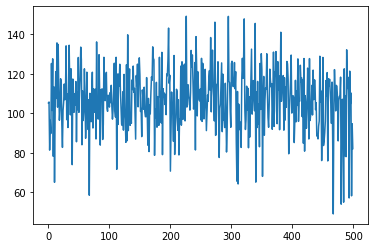

In [29]:
print(keypoints1[0].pt)

d = []
for i in range(len(keypoints2)) :
    d.append(np.mean((desc1[0] - desc2[i])**2))    
plt.plot(d)
print(keypoints2[467].pt)

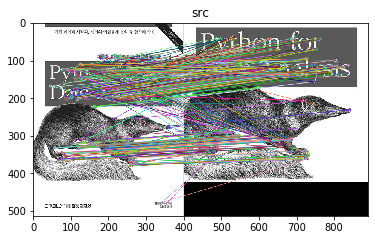

In [15]:
matcher= cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches= matcher.match(desc1, desc2) # 어떤점이 distance값이 작은지 matches에 들어감

dst= cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)
imshow('src',dst)

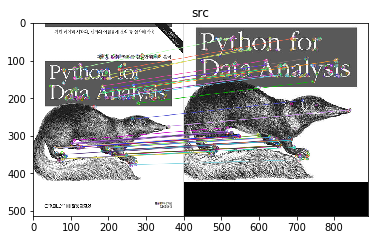

In [17]:
matches= sorted(matches, key=lambda x: x.distance)
good_matches= matches[:50] #전체 매치점중에서 distanc적은 상위50개 그려
dst= cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('src',dst)

In [18]:
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:5]
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
m  = good_matches[0]
print(m.queryIdx, m.trainIdx, m.distance) 
#1영상의 359점과 2영상의 420점이 256비트 중 6bit 차이남
#m은 비트수,

359 420 6.0


In [21]:
distance = [m.distance for m in good_matches]
print(np.mean(distance)) #:평균을 구했다는건 m.queryIdx, m.trainIdx가 얼마나 잘 매칭되는지에 대한 척도가 됨
# 회전,스케일 변화에도 강인하지만 일부데이터가 사라져도 정확하게 찾을수있음
# 잘 매칭되면 평균값이 작음

10.8


# 객체 인식

In [26]:
sift= cv2.ORB_create()
bf= cv2.BFMatcher()
images= ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg']
test= "book1test.jpg"
img= cv2.imread(test)

gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp, dest= sift.detectAndCompute(gray, None)

score=[]
for i in range(0, len(images)):
    img2= cv2.imread(images[i])
    gray2= cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kp2, dest2= sift.detectAndCompute(gray2, None)
    matches= bf.match(dest, dest2)
    matches= sorted(matches, key= lambda x:x.distance)
#     distance= [x.distance for x in matches if x.distance <100]
    distance= np.mean([x.distance for x in matches])
#     score.append(len(distance)) #최소거리 한다면 
    score.append(distance) 
print(score)

# [2, 0, 0, 0] 첫번째 이미지랑 같을 확률 높고, 나머지 영상들이랑은 아예 많이 다르다 알 수 있음


[319.0178219604492, 362.68454962158205, 366.58484927368164, 353.62706341552735]


(<matplotlib.axes._subplots.AxesSubplot at 0x1faa216f908>,
 <matplotlib.image.AxesImage at 0x1fab12f8688>)

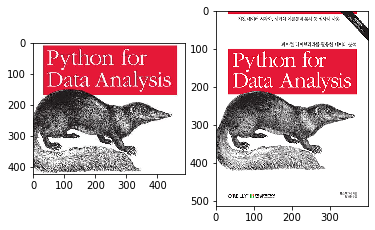

In [28]:
decision= np.argmin(score)  # argmax최대값을 갖는곳의 인덱스 리턴, 거리를 기준으로 한다면 argmin최소값
img2= cv2.imread(images[decision])
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
#컬러에서는 반복성 구현이 어려워 gray 스케일 사용
#CF: gps없어도 되는 인도어 네비게이션 레퍼런스 영상 https://www.youtube.com/watch?v=S5x4onuc300 : 두 영상이 주어졌을때 특징점/매칭점 잘 찾아서 비교


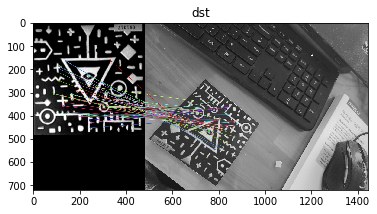

In [30]:
src1 = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('scene01.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50] 

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

imshow('dst', dst) 

In [33]:
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

print(pts1.shape)
# .pt 좌표정보 읽어올수있고,, 
# shape이 50x1x1 3차원이어야함 queryidx가 첫째영상, trainidx가 두번째 영상

(50, 1, 2)


In [34]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H)

[[-6.32286424e-01  5.85445872e-01  3.03567203e+02]
 [-5.48470406e-01 -3.61298891e-01  7.03107040e+02]
 [-2.16475409e-04  4.24247210e-04  1.00000000e+00]]


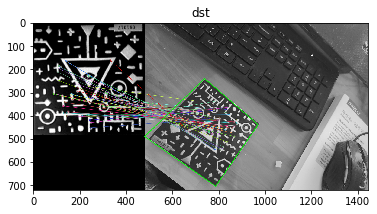

In [35]:
h, w = src1.shape

corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)


#cv2.polylines(src2, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)
corners2 = corners2 + np.float32([w, 0])  #지금 dst가 두개영상합쳐둔거기 때문에 w 더하여 폴리라인 그려줌
cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)  

## cv2.findHomography
## cv2.perspectiveTransform

- 증강현실: 특징점! +3d 입히는것